In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics

# 1. Data Loading

In [2]:
dataset = pd.read_csv('datasets/data.csv')
# link dataset: https://www.kaggle.com/datasets/shree1992/housedata?datasetId=46927
dataset

date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]

# 2. Data Understanding

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Deskripsi variabel:
- date: tanggal dibuatnya data
- price: harga rumah dalam dolar Amerika Serikat (USD)
- bedrooms: jumlah kamar tidur 
- bathrooms: junlah kamar mandi
- sqft_living: luas tempat tinggal / rumah dalam satuan kaki persegi
- sqft_lot: luas tanah dalam satuan kaki persegi
- floors: ukuran lantai 
- waterfront: varibel kategorik apakah rumah dekat tepi laut atau tidak
- view: varibel kategorik apakah rumah memiliki view bagus atau tidak
- condition: varibel kategorik tentang kondisi rumah, semakin besar angka maka semakin bagus kondisinya
- sqft_above: luas atap dalam satuan kaki persegi
- sqft_basement: luas basement dalam satuan kaki persegi
- yr_built: tahun pembangunan rumah
- yr_renovate: tahun renovasi rumah
- street: alamat rumah
- city: kota lokasi rumah
- statezip: kodepos
- country: negara

In [4]:
dataset.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

bisa dilihat pada hasil data describe diatas didapat informasi:
- terdapat kolom yang tidak tercantum dalam tabel diatas merupakan kolom yang tidak relevan terhadap dataset seperti kolom date dan country sehingga akan dihapus.
- kolom street dan city sudah diwakilkan dengan statezip sehingga akan dihapus.
- terdapat nilai 0 atau null pada kolom price. Untuk mengatasinya, akan kita lakukan setelah ini.
- kolom statezip tidak terlihat dalam informasi diatas karena merupakan variabel kategorik. Untuk mengatasinya akan dilakukan proses onehotencoding nanti.

## Hapus kolom yang tidak relevan
Penghapusan kolom ini dilakukan karena kolom - kolom tersebut nantinya tidak akan digunakan dalam permodelan ML sehingga pilihan satu - satunya hanya menghapus kolom tersebut.

In [5]:
dataset.drop(['date', 'street', 'city', 'country'], axis = 1, inplace = True)
dataset

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3        1340              0      1955   
1              0     4          5        3370            280      1921   
2              0     0          4        1930              0      1966   
3              0     0          4        1000           1000      1963   
4              0     0          4        1140            800      1976   
...          ...   ...        ...         ...            ...       ...   
4595           0     0          4        1510              0      1954   
4596           0     0          3        1460              0      1983   
4597           0     0          3        3010              0      2009   
4598           0     0          3        1070           1020      1974   
4599           0     0          4        1490              0      1990   

      yr_renovated  statezip  
0             2005  WA 98133  
1                0  WA 98119  
2                0  WA 98042  
3                0  WA 98008  
4             1992  WA 98052  
...            ...       ...  
4595          1979  WA 98133  
4596          2009  WA 98007  
4597             0  WA 98059  
4598             0  WA 98178  
4599             0  WA 98042  

[4600 rows x 14 columns]

## Mendeteksi data duplikasi dan missing value

In [6]:
duplicate_rows_dataset = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_dataset.shape)

number of duplicate rows:  (0, 14)


In [7]:
print(dataset.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64


Didapat informasi bahwa dataset tidak memiliki missing value ataupun duplikasi.

## Mengatasi nilai outlier pada data

<AxesSubplot:xlabel='sqft_living'>

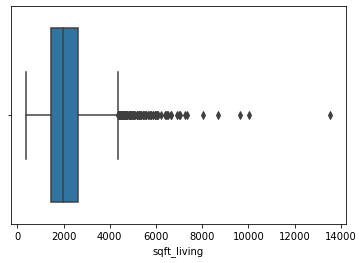

In [8]:
sns.boxplot(x=dataset['sqft_living'])

In [9]:
sns.boxplot(x=dataset['sqft_lot'])

<AxesSubplot:xlabel='sqft_lot'>

<AxesSubplot:xlabel='sqft_above'>

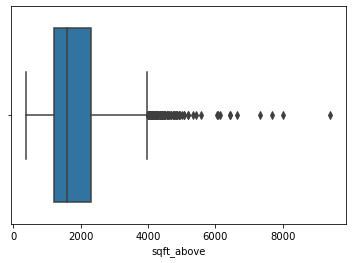

In [10]:
sns.boxplot(x=dataset['sqft_above'])

In [11]:
sns.boxplot(x=dataset['sqft_basement'])

<AxesSubplot:xlabel='sqft_basement'>

Didapat informasi bahwa terdapat nilai outliers pada dataset. Seltman dalam “Experimental Design and Analysis” menyatakan bahwa outliers yang diidentifikasi oleh boxplot (disebut juga “boxplot outliers”) didefinisikan sebagai data yang nilainya 1.5 QR di atas Q3 atau 1.5 QR di bawah Q1. Jadi kita akan Kita akan menggunakan implementasi ini untuk menghilangkan nilai outlier pada baris yang memiliki nilai dibawah 1.5Q1 atau diatas 1.5Q3. 

In [12]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR=Q3-Q1
dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
dataset.shape

C:\Users\ASUS\AppData\Local\Temp/ipykernel_1716/1840165555.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]


(3448, 14)

## Univariate Analysis

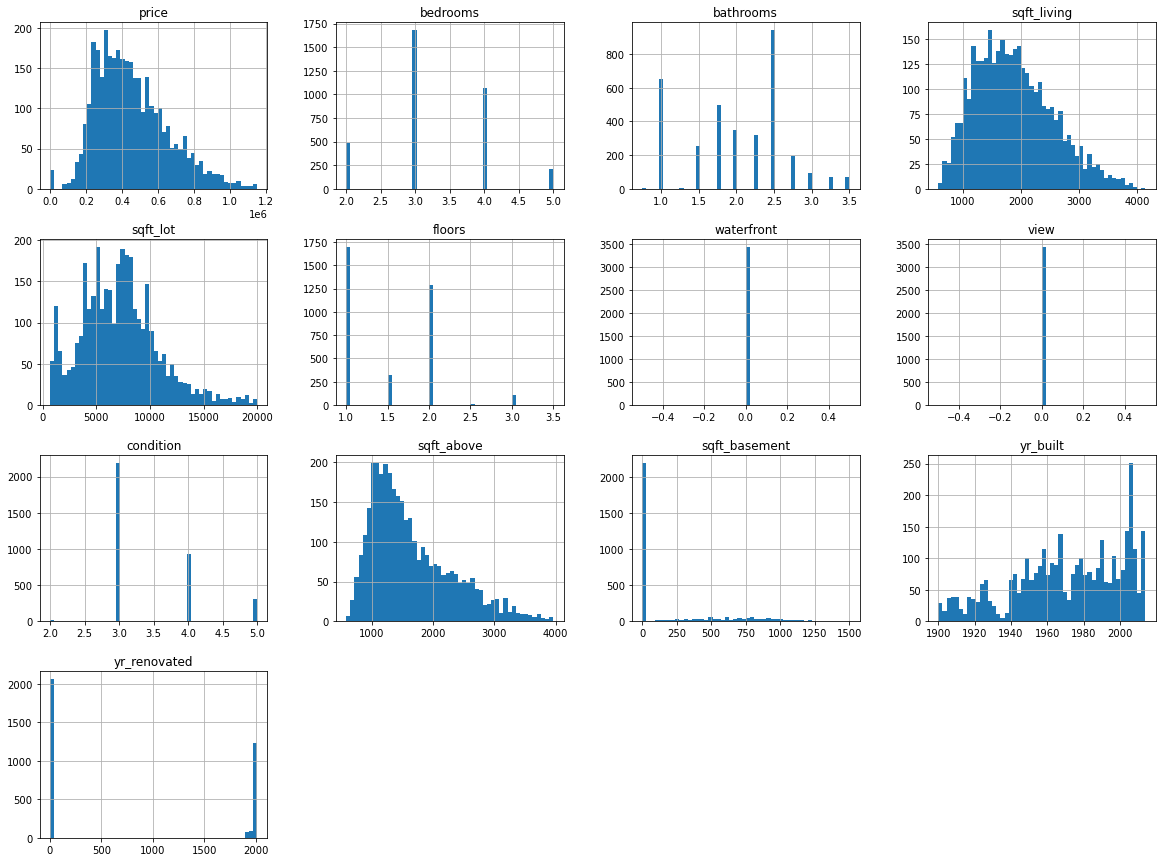

In [13]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Analisis Multivariate

In [14]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(dataset, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur')

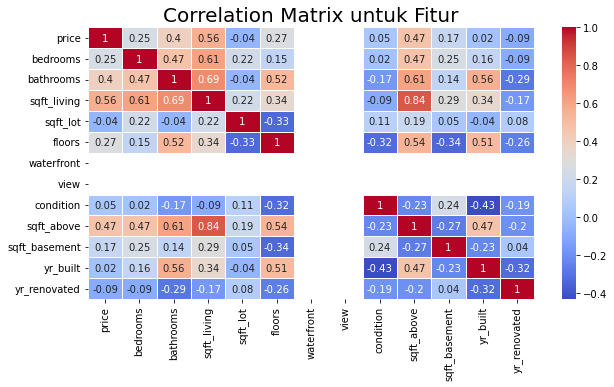

In [15]:
plt.figure(figsize=(10,5))
c= dataset.corr().round(2)
sns.heatmap(c, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title("Correlation Matrix untuk Fitur", size=20)

Berdasarkan hasil analisis univariate dan multivariate, didapatkan informasi sebagai berikut:
- fitur kategorik waterfront dan view tidak relevan terhadap dataset sehingga bisa dihapus
- fitur yang memiliki pengaruh paling besar terhadap harga yaitu fitur sqft_living(luas rumah satuan kaki persegi)

In [16]:
dataset.drop(['waterfront', 'view'], axis = 1, inplace = True)
dataset

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.000000       3.0       1.50         1340      7912     1.5   
2     342000.000000       3.0       2.00         1930     11947     1.0   
3     420000.000000       3.0       2.25         2000      8030     1.0   
4     550000.000000       4.0       2.50         1940     10500     1.0   
5     490000.000000       2.0       1.00          880      6380     1.0   
...             ...       ...        ...          ...       ...     ...   
4595  308166.666667       3.0       1.75         1510      6360     1.0   
4596  534333.333333       3.0       2.50         1460      7573     2.0   
4597  416904.166667       3.0       2.50         3010      7014     2.0   
4598  203400.000000       4.0       2.00         2090      6630     1.0   
4599  220600.000000       3.0       2.50         1490      8102     2.0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  statezip  
0             3        1340              0      1955          2005  WA 98133  
2             4        1930              0      1966             0  WA 98042  
3             4        1000           1000      1963             0  WA 98008  
4             4        1140            800      1976          1992  WA 98052  
5             3         880              0      1938          1994  WA 98115  
...         ...         ...            ...       ...           ...       ...  
4595          4        1510              0      1954          1979  WA 98133  
4596          3        1460              0      1983          2009  WA 98007  
4597          3        3010              0      2009             0  WA 98059  
4598          3        1070           1020      1974             0  WA 98178  
4599          4        1490              0      1990             0  WA 98042  

[3448 rows x 12 columns]

# 3. Data Preparation

## One Hot Encoding

In [17]:
dataset.statezip.value_counts()

WA 98103    129
WA 98117    120
WA 98052    117
WA 98115    115
WA 98133     90
           ... 
WA 98288      1
WA 98068      1
WA 98051      1
WA 98050      1
WA 98039      1
Name: statezip, Length: 77, dtype: int64

In [18]:
le = LabelEncoder()
dataset['statezip_encoded'] = le.fit_transform(dataset.statezip)
dataset.head()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_1716/2997380948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['statezip_encoded'] = le.fit_transform(dataset.statezip)


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  313000.0       3.0       1.50         1340      7912     1.5          3   
2  342000.0       3.0       2.00         1930     11947     1.0          4   
3  420000.0       3.0       2.25         2000      8030     1.0          4   
4  550000.0       4.0       2.50         1940     10500     1.0          4   
5  490000.0       2.0       1.00          880      6380     1.0          3   

   sqft_above  sqft_basement  yr_built  yr_renovated  statezip  \
0        1340              0      1955          2005  WA 98133   
2        1930              0      1966             0  WA 98042   
3        1000           1000      1963             0  WA 98008   
4        1140            800      1976          1992  WA 98052   
5         880              0      1938          1994  WA 98115   

   statezip_encoded  
0                62  
2                26  
3                 7  
4                31  
5                54

In [19]:
dataset.statezip_encoded.value_counts()

47    129
56    120
31    117
54    115
62     90
     ... 
75      1
39      1
30      1
29      1
24      1
Name: statezip_encoded, Length: 77, dtype: int64

In [20]:
dataset.drop(['statezip'], axis = 1, inplace = True)
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  313000.0       3.0       1.50         1340      7912     1.5          3   
2  342000.0       3.0       2.00         1930     11947     1.0          4   
3  420000.0       3.0       2.25         2000      8030     1.0          4   
4  550000.0       4.0       2.50         1940     10500     1.0          4   
5  490000.0       2.0       1.00          880      6380     1.0          3   

   sqft_above  sqft_basement  yr_built  yr_renovated  statezip_encoded  
0        1340              0      1955          2005                62  
2        1930              0      1966             0                26  
3        1000           1000      1963             0                 7  
4        1140            800      1976          1992                31  
5         880              0      1938          1994                54

## Train Test Split 

In [21]:
X = dataset.drop(["price"],axis =1)
y = dataset["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [22]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3448
Total # of sample in train dataset: 2758
Total # of sample in test dataset: 690


## StandardScaler

In [23]:
numerical_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'statezip_encoded']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


sqft_living  sqft_lot  sqft_above  sqft_basement  statezip_encoded
2366    -1.354073 -0.425629   -1.002121      -0.648110          0.846025
3750    -0.699111 -0.217463   -1.091931       0.701196          0.701555
2669    -0.267432  0.093952    0.090566      -0.648110         -1.032087
2215    -0.207890 -0.994190   -1.032058       1.483793          0.846025
3287    -0.520485  0.471879   -0.987153       0.836126          0.460771

In [24]:
X_train[numerical_features].describe().round(4)

sqft_living   sqft_lot  sqft_above  sqft_basement  statezip_encoded
count    2758.0000  2758.0000   2758.0000      2758.0000         2758.0000
mean        0.0000     0.0000     -0.0000        -0.0000           -0.0000
std         1.0002     1.0002      1.0002         1.0002            1.0002
min        -1.9346    -1.8127     -1.5859        -0.6481           -1.8989
25%        -0.7587    -0.6819     -0.7477        -0.6481           -0.8395
50%        -0.1037    -0.0263     -0.2836        -0.6481            0.1237
75%         0.6517     0.5636      0.5845         0.6742            0.8460
max         3.3646     3.5543      3.4734         3.3998            1.7610

# 4. Model Development

In [25]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['LinearRegression', 'kNN', 'RandomForest'])
models

LinearRegression  kNN RandomForest
train_mse              NaN  NaN          NaN
test_mse               NaN  NaN          NaN

## Linear Regression

In [26]:
LR = LinearRegression()
LR.fit(X_train, y_train)

models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred = LR.predict(X_train), y_true=y_train)

## KNN

In [27]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)
 
models.loc['train_mse','kNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [28]:
models

LinearRegression             kNN RandomForest
train_mse  22389371092.245834  1018536.983321          NaN
test_mse                  NaN             NaN          NaN

## Random Forest

In [29]:
 # buat model prediksi
RF = RandomForestRegressor(n_estimators=45, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [30]:
models

LinearRegression             kNN       RandomForest
train_mse  22389371092.245834  1018536.983321  2546717762.467758
test_mse                  NaN             NaN                NaN

# 5. Model Evaluation

In [31]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [32]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LR','KNN','RF'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LR': LR, 'KNN': knn, 'RF': RF}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

train             test
LR   22389371.092246  25245050.576271
KNN      1018.536983  31245753.131294
RF    2546717.762468  16631677.121966

In [33]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [34]:
prediksi = X_test.iloc[:2].copy()
pred_dict = {'y_true':y_test[:2]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

y_true  prediksi_LR  prediksi_KNN  prediksi_RF
2629  235000.0     315775.3      315584.5     274259.3
2324  545000.0     457072.8      624910.4     507773.2